# Spam Comments Detection

## Tahap 1: Data Preparation and Data Cleaning
------------------------------------------------

##### **Daftar Isi pada Notebook**
1. Background - Latar belakang pembuatan projek dan sumber data yang digunakan hingga tujuan penelitian
2. Notebook Setup - mengimport package dan data
3. Overview data
5. Data Cleaning
   - remove duplicate comments
   - replace slangwords
   - remove stopwords
   - remove white spaces
6. Feature Extraction
    - url_ratio
    - word_duplicate
7. Export data yang telah dilakukan prepocessing kedalam format .csv

------------------------------------------------------

**1. Background**

**Latar Belakang Project**



**Tujuan Project**
Pada project kali ini pendeteksian komentar spam dilakukan untuk menemukan komentar yang tidak relevan berisikan "promosi" sehingga hasilnya dapat digunakan untuk mengetahui sebuah komentar yang relevan dengan konten videonya. 


---------------------------------------------------

**Sumber Data**

Data yang digunakan berasal dari YouTube dengan melakukan crawling data menggunakan YouTube Data API. Mengekstrak dataset berdasarkan query yang telah dipilih, kemudian untuk memperoleh komentar dengan videoId menggunakan videoId.

Metadata yang dipilih anatara lain:
- videoId
- Tittle Video
- Name (username)
- Commment
- CommentId
- Time
- Like
- Reply Count
- Label

---------------------------------------------------

**Notebook Setup**

In [2]:
import pandas as pd
import glob
import os
import regex as re
import emoji
import pandas as pd
import numpy as np
import time
import string
from string import punctuation
import seaborn as sns
import datetime
import spacy
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from tqdm import tqdm
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
#from spacy.lang.id import Indonesian
#from spacy.lang.id.stop_words import STOP_WORDS
import warnings; warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("..\Data\Data Label\dataLabel_3003.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Video_Id     3003 non-null   object 
 1   Tittle       3003 non-null   object 
 2   Name         3003 non-null   object 
 3   Comment      3003 non-null   object 
 4   Comment_Id   3003 non-null   object 
 5   Time         3003 non-null   object 
 6   Likes        3003 non-null   int64  
 7   Reply_Count  2624 non-null   float64
 8   Label        3003 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 211.3+ KB


In [4]:
df["Label"] = df["Label"].astype("category")
df["Time"] = df["Time"].astype("datetime64")

In [5]:
df.head()

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label
0,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Doharman Patimura Waruwu,https://youtu.be/LBKGyxnpMCU,Ugz-zdD0s87dSDzITuh4AaABAg,2019-01-17 23:06:24,0,0.0,spam
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Akiru Syakir,Bantu subscribe youtube gw dong,UgwQM2OHIzkVDtu0PIN4AaABAg,2019-04-10 22:40:00,0,0.0,spam
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Teguh Wage Prakoso,"hachimon tonkou, kalau buka gerbang ke 8 auto ...",Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,2019-04-09 02:50:06,0,NaN,spam
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,hidayah,https://www.youtube.com/channel/UC_iQ1hcNxz1ir...,UgxA-h0VMWXoShPkFEZ4AaABAg,2019-04-10 12:25:49,0,0.0,spam
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Derisma Ae,"https://youtu.be/aS1FIPcCuh4 CH: Derisma ae, m...",UgybtnYbYjDF7YZJAdN4AaABAg,2019-04-15 16:00:05,0,0.0,spam


In [6]:
data = df.drop_duplicates(subset=["Comment", "Comment_Id"], keep=False)

In [7]:
B, K = data.shape
print(f"Banyaknya Saat ini adalah Baris: {B} dan Kolom: {K}")

Banyaknya Saat ini adalah Baris: 3001 dan Kolom: 9


In [8]:
data.isnull().sum()

Video_Id         0
Tittle           0
Name             0
Comment          0
Comment_Id       0
Time             0
Likes            0
Reply_Count    379
Label            0
dtype: int64

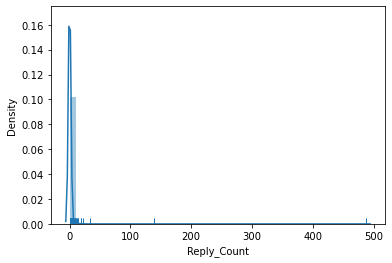

In [9]:
p = sns.distplot(data['Reply_Count'], kde=True, rug=True)

In [10]:
data['Reply_Count'].fillna(data['Reply_Count'].median(),inplace=True)

In [11]:
data.isnull().sum()

Video_Id       0
Tittle         0
Name           0
Comment        0
Comment_Id     0
Time           0
Likes          0
Reply_Count    0
Label          0
dtype: int64

In [12]:
data["Reply_Count"] = data["Reply_Count"].astype("int64")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3001 entries, 0 to 3002
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Video_Id     3001 non-null   object        
 1   Tittle       3001 non-null   object        
 2   Name         3001 non-null   object        
 3   Comment      3001 non-null   object        
 4   Comment_Id   3001 non-null   object        
 5   Time         3001 non-null   datetime64[ns]
 6   Likes        3001 non-null   int64         
 7   Reply_Count  3001 non-null   int64         
 8   Label        3001 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 214.0+ KB


In [14]:
#count comments words length
def count_length(text):
    return len(text)

In [15]:
data['Length_Comment'] = data['Comment'].apply(lambda x: count_length(x))

In [16]:
data.sample(10)

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment
2743,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Emon Sulaeman,Seruuu,UgxS-2BLegpA35-2xhx4AaABAg,2019-04-20 01:54:06,0,0,legitimate,6
86,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,David Sianipar,*Give away* ✨\nRules :\n1. Subscribe akun saya...,UgzCOP0KuCM22V4cBNJ4AaABAg,2019-04-12 01:59:13,0,0,spam,232
2141,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Dunia Faiss,Yg Nonton Bulan Desember,UgzsyNzyqXAabgBKf0F4AaABAg,2019-12-05 11:23:59,0,0,legitimate,24
569,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Kota Tanyoe,"Mantap banget karnyanya, \nayok nonton juga vi...",Ugwa7Ps9YIxUYOmASoF4AaABAg,2019-04-12 06:45:44,0,0,spam,148
759,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,HW AR Production,https://youtu.be/S5sbVpjv2aw\n\nPamer Bojo Cov...,UgzOKuQ06ko2R65BWcV4AaABAg,2019-04-10 15:06:11,0,0,spam,68
716,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,wahdatun thoibah_Manajemen 7B,https://youtu.be/RICoi_7u7fU\n\nAssalamualaiku...,UgwY0aJE6M70RBDXQUd4AaABAg,2020-08-08 05:49:25,0,0,spam,257
347,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,alday walker,Yang punya kontol download Tante sange https:/...,UgxWQb3XlSWqH02u9nJ4AaABAg,2019-04-11 14:19:06,0,0,spam,78
949,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Twoninedes Naibaho,Bantu Subscribe YouTuber baru kak https://you...,UgyPQtqfYzEe5Ww9RnJ4AaABAg,2019-04-14 14:57:12,0,0,spam,92
1548,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Gibran Ramadan AlGifari,Yg nonton sambil lihat komentar Like,Ugz7gt0l-LqXhwk68ud4AaABAg,2019-05-02 02:23:47,1,0,legitimate,36
2321,LU2p56QVUWA,Debat Jokowi Vs Prabowo Soal Ideologi &amp; Pe...,Donik Astutik,Mantab salam 2 periode.. 02 itu mah paling keok,UgyHqiNt2xgNX3gnDVt4AaABAg.8t6VdzSB_-B8t6bDqImufm,2019-03-30 18:16:11,2,0,legitimate,47


## EDA

### Comments that got most 

In [17]:
like = data[data['Likes']== data['Likes'].max()]
print("Komentar dengan like terbanyak adalah \n {}".format(like.iloc[0].Comment))

Komentar dengan like terbanyak adalah 
 Official Teaser Trailer Film Bucin. Tayang Maret 2020. https://www.youtube.com/watch?v=rdLn2rcJjk0
Update terbaru: Video paling populer no 1 di Indonesia tahun 2019. Terima kasih semuanya!
Prabowo Vs Jokowi - Behind The Scenes Epic Rap Battles Of Presidency
 https://www.youtube.com/watch?v=N1X4WmVMRMg
Prabowo VS Jokowi - Epic Rap Battles Of Presidency - Bedah Lirik - Jenius (Genius Parody) https://youtu.be/AYK71Exj0M0
Prabowo Vs Jokowi - Bedah Lirik Part 2 https://youtu.be/prSN3P5fb0o
Prabowo VS Jokowi - Epic Rap Battles Of Presidency (Green Screen Cut) https://youtu.be/1Ofs0y0ZeTg


### 10 YouTube Account that comments have most reply

In [18]:
account = data['Name'].value_counts().head(10)
account = pd.DataFrame(data=account)
account.reset_index(inplace=True)
account = account.rename(columns = {"index" : "Youtube_Account",
                                    'Name': "reply_count"})
fig = px.bar(account, x='Youtube_Account', y='reply_count',
            color='Youtube_Account', title='10 YouTube Account that comments have most reply')
fig.show()

### Peak time to comments

In [19]:
peak_time = data.copy()
times = peak_time['Time']

In [20]:
peak_time["Date"] = peak_time["Time"].dt.day_name()
peak_time.head(5)

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment,Date
0,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Doharman Patimura Waruwu,https://youtu.be/LBKGyxnpMCU,Ugz-zdD0s87dSDzITuh4AaABAg,2019-01-17 23:06:24,0,0,spam,28,Thursday
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Akiru Syakir,Bantu subscribe youtube gw dong,UgwQM2OHIzkVDtu0PIN4AaABAg,2019-04-10 22:40:00,0,0,spam,31,Wednesday
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Teguh Wage Prakoso,"hachimon tonkou, kalau buka gerbang ke 8 auto ...",Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,2019-04-09 02:50:06,0,0,spam,57,Tuesday
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,hidayah,https://www.youtube.com/channel/UC_iQ1hcNxz1ir...,UgxA-h0VMWXoShPkFEZ4AaABAg,2019-04-10 12:25:49,0,0,spam,56,Wednesday
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Derisma Ae,"https://youtu.be/aS1FIPcCuh4 CH: Derisma ae, m...",UgybtnYbYjDF7YZJAdN4AaABAg,2019-04-15 16:00:05,0,0,spam,88,Monday


In [21]:
def time(date):
    Time = date.time()
    return Time

peak_time['Period'] = times.map(time)
peak_time['Period'].head()

0    23:06:24
1    22:40:00
2    02:50:06
3    12:25:49
4    16:00:05
Name: Period, dtype: object

In [22]:
def time_groups(time):
    if time >= datetime.time(0,0) and time <= datetime.time(1,0):
        return '24:00 - 01:00'
    elif time >= datetime.time(1,0) and time <= datetime.time(2,0):
        return '01:00 - 02:00 '
    elif time >= datetime.time(2,0) and time <= datetime.time(3,0):
        return '02:00 - 03:00 '
    elif time >= datetime.time(3,0) and time <= datetime.time(4,0):
        return '03:00 - 04:00'
    elif time >= datetime.time(4,0) and time <= datetime.time(5,0):
        return '04:00 - 05:00'
    elif time >= datetime.time(5,0) and time <= datetime.time(6,0):
        return '05:00 - 06:00 '
    elif time >= datetime.time(6,0) and time <= datetime.time(7,0):
        return '06:00 - 07:00 '
    elif time >= datetime.time(7,0) and time <= datetime.time(8,0):
        return '07:00 - 08:00 '
    elif time >= datetime.time(8,0) and time <= datetime.time(9,0):
        return '08:00 - 09:00 '
    elif time >= datetime.time(9,0) and time <= datetime.time(10,0):
        return '09:00 - 10:00 '
    elif time >= datetime.time(10,0) and time <= datetime.time(11,0):
        return '10:00 - 11:00 '
    elif time >= datetime.time(11,0) and time <= datetime.time(12,0):
        return '11:00 - 12:00'
    elif time >= datetime.time(12,0) and time <= datetime.time(13,0):
        return '12:00 - 13:00'
    elif time >= datetime.time(13,0) and time <= datetime.time(14,0):
        return '13:00 - 14:00'
    elif time >= datetime.time(14,0) and time <= datetime.time(15,0):
        return '14:00 - 15:00'
    elif time >= datetime.time(15,0) and time <= datetime.time(16,0):
        return '15:00 - 16:00'
    elif time >= datetime.time(16,0) and time <= datetime.time(17,0):
        return '16:00 - 17:00'
    elif time >= datetime.time(17,0) and time <= datetime.time(18,0):
        return '17:00 - 18:00'
    elif time >= datetime.time(18,0) and time <= datetime.time(19,0):
        return '18:00 - 19:00'
    elif time >= datetime.time(19,0) and time <= datetime.time(20,0):
        return '19:00 - 20:00'
    elif time >= datetime.time(20,0) and time <= datetime.time(21,0):
        return '20:00 - 21:00'
    elif time >= datetime.time(21,0) and time <= datetime.time(22,0):
        return '21:00 - 22:00'
    elif time >= datetime.time(22,0) and time <= datetime.time(23,0):
        return '22:00 - 23:00'
    elif time >= datetime.time(23,0) and time <= datetime.time(23,59):
        return '23:00 - 24:00'
    else:
        return 'other'

In [23]:
peak_time["Period_groups"] = peak_time['Period'].map(time_groups)
peak_time.head()

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment,Date,Period,Period_groups
0,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Doharman Patimura Waruwu,https://youtu.be/LBKGyxnpMCU,Ugz-zdD0s87dSDzITuh4AaABAg,2019-01-17 23:06:24,0,0,spam,28,Thursday,23:06:24,23:00 - 24:00
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Akiru Syakir,Bantu subscribe youtube gw dong,UgwQM2OHIzkVDtu0PIN4AaABAg,2019-04-10 22:40:00,0,0,spam,31,Wednesday,22:40:00,22:00 - 23:00
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Teguh Wage Prakoso,"hachimon tonkou, kalau buka gerbang ke 8 auto ...",Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,2019-04-09 02:50:06,0,0,spam,57,Tuesday,02:50:06,02:00 - 03:00
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,hidayah,https://www.youtube.com/channel/UC_iQ1hcNxz1ir...,UgxA-h0VMWXoShPkFEZ4AaABAg,2019-04-10 12:25:49,0,0,spam,56,Wednesday,12:25:49,12:00 - 13:00
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Derisma Ae,"https://youtu.be/aS1FIPcCuh4 CH: Derisma ae, m...",UgybtnYbYjDF7YZJAdN4AaABAg,2019-04-15 16:00:05,0,0,spam,88,Monday,16:00:05,16:00 - 17:00


In [24]:
time_group = peak_time['Period_groups'].value_counts().head(10)
time_group = pd.DataFrame(data=time_group)
time_group.reset_index(inplace=True)
time_group = time_group.rename(columns = {'index':'Time','Period_groups':'Most Comment'})
time_group

fig2 = px.bar(time_group, x='Time', y='Most Comment', 
              color='Time', title = 'Peak Time Comments Video', height=400)
fig2.show()

In [25]:
day_group = peak_time['Date'].value_counts().head(7)
day_group = pd.DataFrame(data=day_group)
day_group.reset_index(inplace=True)
day_group = day_group.rename(columns = {'index':'Day','Date':'Most Comment'})
day_group

fig2 = px.bar(day_group, x='Day', y='Most Comment', 
              color='Day', title = 'Peak Day Comments Video', height=400)
fig2.show()

### Spam and Legitimate Comments Histogram

In [26]:
label = peak_time['Label'].value_counts().head(7)
label = pd.DataFrame(data=label)
label.reset_index(inplace=True)
label = label.rename(columns = {'index':'Kind of Label','Label':'Count a Spam or Legitimate'})
label

fig2 = px.bar(label, x='Kind of Label', y='Count a Spam or Legitimate', 
              color='Kind of Label', title = 'Spam or Legitimate Comments', height=800)
fig2.show()

## Cleaning Text

In [27]:
try_data_cleaning = data.copy()

In [28]:
try_data_cleaning

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment
0,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Doharman Patimura Waruwu,https://youtu.be/LBKGyxnpMCU,Ugz-zdD0s87dSDzITuh4AaABAg,2019-01-17 23:06:24,0,0,spam,28
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Akiru Syakir,Bantu subscribe youtube gw dong,UgwQM2OHIzkVDtu0PIN4AaABAg,2019-04-10 22:40:00,0,0,spam,31
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Teguh Wage Prakoso,"hachimon tonkou, kalau buka gerbang ke 8 auto ...",Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,2019-04-09 02:50:06,0,0,spam,57
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,hidayah,https://www.youtube.com/channel/UC_iQ1hcNxz1ir...,UgxA-h0VMWXoShPkFEZ4AaABAg,2019-04-10 12:25:49,0,0,spam,56
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Derisma Ae,"https://youtu.be/aS1FIPcCuh4 CH: Derisma ae, m...",UgybtnYbYjDF7YZJAdN4AaABAg,2019-04-15 16:00:05,0,0,spam,88
...,...,...,...,...,...,...,...,...,...,...
2998,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,agus muliandri,Top,UgxG_8lxSoZduOAiE-54AaABAg.8tXxFBA8lZa8tXzXBaY73i,2019-04-10 09:28:02,0,0,legitimate,3
2999,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,EXE HUMAN,Creator senior memang beda ya 😎,Ugx4Ep3GEADS4c_w5YF4AaABAg,2019-04-09 11:43:58,0,0,legitimate,31
3000,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Ni Luh Ayu Sibang Sri Padmayanti_056,Keunggulan dan kekurangan nge buat kita semua ...,UgzltfmrOp2dr3DbCPx4AaABAg,2019-04-11 13:48:07,0,0,legitimate,64
3001,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Brigita Deya 183,Keren parahhh,UgyaAGTI4x4ta4TE1cF4AaABAg,2019-04-09 10:20:06,0,0,legitimate,13


In [85]:
toyData = try_data_cleaning.sample(10)

In [86]:
toyData

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment
2251,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,rezahami,Hatta apakah perjuangan kita sia sia,UgwpS011zzqiZi9A0BF4AaABAg,2019-04-14 01:32:26,0,0,legitimate,36
288,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Hideaki Official,Gua udh subscribe subscribe balik,Ugy219edTzKN3ieYLgZ4AaABAg,2019-04-28 00:46:56,0,0,spam,33
635,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Angga,@Dewi Larasati edit : https://youtu.be/NWT9x1l...,Ugx1Zf0lTk9Shoi4OOx4AaABAg.8tbq-alpG788tbzqmaf5tl,2019-04-12 08:07:02,0,0,spam,50
612,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Yuris Muda Indonesia,Reaksi Keluarga atas viralnya Video Adhisty Za...,UgzVxlllFfL7E9Qw2zR4AaABAg,2020-08-22 03:06:34,0,1,spam,79
761,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Harun,https://youtu.be/pb3s_nRph0A,UgyhtL5zop9dDKYK_ap4AaABAg,2019-04-10 04:36:45,0,0,spam,28
163,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Herry Daniel Marpaung TV,Subscribe Chanel saya ya. Baru buat hehehe. Te...,UgzoyEQ5jV2_hJV7aTN4AaABAg,2019-04-11 05:51:30,0,0,spam,56
1627,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,DimDimm,Asli di buka bukain kartu Jokowi 😂,UgwMxqtpZ5O3n3T-9WJ4AaABAg,2019-04-10 09:57:38,0,0,legitimate,34
488,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Lia Tema,"Tuhan Roh Kudus , Tuhan Ruhul Qudus akan melaw...",UgwlTTawAuZrboIAWGp4AaABAg,2019-04-10 00:17:15,1,2,spam,526
2309,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Apri Kurniawan,Bapak Prabowo BLUNDER Bismillah Pak Jokowi RI1,UgwPaVWA-92mpdaX8Il4AaABAg,2019-01-17 17:56:38,0,0,legitimate,46
1881,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Pelukis Dendam,Mantappppp bisa gusur kpopers..,UgyFgwvnOybH98DrxGV4AaABAg,2019-04-09 13:36:40,0,0,legitimate,31


In [88]:
toyData.to_csv("../Data/Comments/toyData.csv", index=False)

In [29]:
toyData = pd.read_csv("../Data/Comments/toyData.csv")

In [30]:
#NLTK_StopWords = stopwords.words('english')
factory = StopWordRemoverFactory()
Sastrawi_StopWords_id = factory.get_stop_words()

In [31]:
Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

In [32]:
import emoji 

def lower(text):
    text = text.lower()
    return text
    
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def remove_emoji(text):
    pattern = emoji.get_emoji_regexp()
    without_emoji = pattern.sub('', text)
    return without_emoji

#def replace_url(text, replacement):
    text = str(text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', replacement, text)
    text = re.sub('[/]?watch(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', replacement, text)
    return text

'''Detect link and replace with url'''
urlregex = re.compile(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")

def detecturl(text):
    url_filtered_comment = re.sub(urlregex, ' ',text)
    return url_filtered_comment

def url(text):
    punc_table = {ord(c): None for c in punctuation}
    text ="".join(t if i % 2 else t.translate(punc_table) for (i, t) in enumerate(urlregex.split(text)))
    return text

def remove_punc_except_urls(s, punctuationRegex=r'[^a-zA-Z0-9\s]'):
  # arrays to keep track of indices
  urlInds = []
  puncInds = []
  # find all the urls
  for m in re.finditer(r'(https?|ftp)://[^\s/$.?#].[^\s]*', s):
    urlInds.append((m.start(0), m.end(0)))
  # find all the punctuation
  for m in re.finditer(punctuationRegex, s):
    puncInds.append((m.start(0), m.end(0)))
  # start removing punctuation from end so that indices do not change
  puncInds.reverse()
  # go through each of the punctuation indices and remove the character if it is not inside a url
  for puncRange in puncInds:
    inUrl = False
    # check each url to see if this character is in it
    for urlRange in urlInds:
      if puncRange[0] >= urlRange[0] and puncRange[0] <= urlRange[1]:
        inUrl = True
        break
    if not inUrl:
      # remove the punctuation from the string
      s = s[:puncRange[0]] + s[puncRange[1]:]
  return s

#def detecturl(text, replace):
#    url_filtered_comment = re.sub(urlregex, replace,text)
#    return url_filtered_comment

'''hastags'''
#def fixTags(T):
#    getHashtags = re.compile(r"#(\w+)")
#    pisahtags = re.compile(r'[A-Z][^A-Z]*')
#    t = T
#    tagS = re.findall(getHashtags, T)
#    for tag in tagS:
#        proper_words = ' '.join(re.findall(pisahtags, tagS[0]))
#        t = t.replace('#' + tag, proper_words)
#    return t

#def getTags(T):
#    getHashtags = re.compile(r"#(\w+)")
#    tagS = re.findall(getHashtags, T)
    #isitag = []
    #for tag in tagS:       
    #    tag = '#'+tag
    #    isitag.append(tag)
    
#    return ', '.join(isitag)

'''remove punctuation'''
clean_spcl = re.compile('[/(){}\[\]\|!;$]')
clean_symbol = re.compile('[^.,a-zA-Z0-9\n\.]')
simbol = re.compile(r'#(^\w)')

def clean_punct(text):
    text = clean_spcl.sub(' ', text)
    #text = clean_symbol.sub(' ', text)
    return text

def hastag(text):   
    text = simbol.sub('', text)
    return text

def clean_symbols(text): #this function remove the #
    text = clean_symbol.sub(' ', text)
    return text

'''white_spaces'''
def white_spaces(text):
    single_char_pattern = re.compile(r'\s+')
    text = re.sub(pattern=single_char_pattern, repl=' ', string=text)
    return text

'''Stopwords Sastrawi'''
stopwords = set(Sastrawi_StopWords_id)

def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopwords) # hapus stopword dari kolom deskripsi
    return text

def en_stopwords(text):
    df=open('..\Stopwords_eng\stopwords_en.txt',"r",encoding="utf-8", errors='replace')
    en_stop = df.readlines()
    df.close()
    en_stop = [t.strip().lower() for t in en_stop]
    en_stop = set(en_stop)
    text = ' '.join(word for word in text.split() if word not in en_stop) # hapus stopword dari kolom deskripsi
    return text
    
def id_stopwords(text):
    df=open('..\Stopwords\stopwords.txt',"r",encoding="utf-8", errors='replace')
    id_stop = df.readlines()
    df.close()
    id_stop = [t.strip().lower() for t in id_stop]
    id_stop = set(id_stop)
    text = ' '.join(word for word in text.split() if word not in id_stop) # hapus stopword dari kolom deskripsi
    return text

'''Slangwords'''
def slang(text):
    df=open('../Slangwords/slangwords.txt',"r",encoding="utf-8", errors='replace')
    slangS = df.readlines()
    slangS = [t.split(":") for t in slangS]
    slangS = [[k.strip(), v.strip()] for k,v in slangS]
    slangS = {k:v for k,v in slangS}

    T = TextBlob(text).words
    
    for i,t in enumerate(T):
        if t in slangS.keys():
            T[i] = slangS[t]
        
    T =' '.join(T)

    return T

In [31]:
#urlregex = re.compile(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")

#def detecturl(comment):
#    url_filtered_comment = re.sub(urlregex, 'url', comment)
#    return url_filtered_comment

In [148]:
text = 'https://youtu.be/pb3s_nRph0A'

In [149]:
remove_punc_except_urls(text)

'https://youtu.be/pb3s_nRph0A'

In [106]:
url(text)

'www.facebook.com'

In [33]:
toyData['cleaned_title'] =toyData['Tittle'].apply(lambda x: clean_punct(x))

**cleaned_comment_1**

Pada proses cleaning comment pertama ini **tidak melakukan** beberapa hal:
- remove emoji
- remove simbol
- stopwords menggunakan modul sastrawi

In [34]:
toyData['cleaned_comment_1'] = toyData['Comment'].apply(lambda x: lower(x))
#toyData['cleaned_comment_1'] = toyData['cleaned_comment_1'].apply(lambda x: remove_emoji(x))
toyData["cleaned_comment_1"] = toyData["cleaned_comment_1"].apply(lambda x: detecturl(x))
#toyData['cleaned_comment_1'] = toyData['cleaned_comment_1'].apply(lambda x: getTags(x))
toyData['cleaned_comment_1'] = toyData['cleaned_comment_1'].apply(lambda x: clean_punct(x))
toyData['cleaned_comment_1'] = toyData['cleaned_comment_1'].apply(lambda x: white_spaces(x))
#toyData['cleaned_comment_1'] = toyData['cleaned_comment_1'].apply(lambda x: clean_stopwords(x))
toyData['cleaned_comment_1'] = toyData['cleaned_comment_1'].apply(lambda x: en_stopwords(x))
toyData['cleaned_comment_1'] = toyData['cleaned_comment_1'].apply(lambda x: id_stopwords(x))
toyData['cleaned_comment_1'] = toyData['cleaned_comment_1'].apply(lambda x: slang(x))

In [35]:
toyData

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment,cleaned_title,cleaned_comment_1
0,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,rezahami,Hatta apakah perjuangan kita sia sia,UgwpS011zzqiZi9A0BF4AaABAg,2019-04-14 01:32:26,0,0,legitimate,36,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,hatta apakah perjuangan kita sia sia
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Hideaki Official,Gua udh subscribe subscribe balik,Ugy219edTzKN3ieYLgZ4AaABAg,2019-04-28 00:46:56,0,0,spam,33,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,saya subscribe subscribe kembali
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Angga,@Dewi Larasati edit : https://youtu.be/NWT9x1l...,Ugx1Zf0lTk9Shoi4OOx4AaABAg.8tbq-alpG788tbzqmaf5tl,2019-04-12 08:07:02,0,0,spam,50,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,dewi larasati edit
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Yuris Muda Indonesia,Reaksi Keluarga atas viralnya Video Adhisty Za...,UgzVxlllFfL7E9Qw2zR4AaABAg,2020-08-22 03:06:34,0,1,spam,79,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,reaksi keluarga viralnya video adhisty zara
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Harun,https://youtu.be/pb3s_nRph0A,UgyhtL5zop9dDKYK_ap4AaABAg,2019-04-10 04:36:45,0,0,spam,28,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,
5,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Herry Daniel Marpaung TV,Subscribe Chanel saya ya. Baru buat hehehe. Te...,UgzoyEQ5jV2_hJV7aTN4AaABAg,2019-04-11 05:51:30,0,0,spam,56,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,subscribe channel saya ya baru tertawa terima ...
6,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,DimDimm,Asli di buka bukain kartu Jokowi 😂,UgwMxqtpZ5O3n3T-9WJ4AaABAg,2019-04-10 09:57:38,0,0,legitimate,34,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,asli buka bukain kartu jokowi 😂
7,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Lia Tema,"Tuhan Roh Kudus , Tuhan Ruhul Qudus akan melaw...",UgwlTTawAuZrboIAWGp4AaABAg,2019-04-10 00:17:15,1,2,spam,526,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,tuhan roh kudus tuhan ruhul qudus melawat penu...
8,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Apri Kurniawan,Bapak Prabowo BLUNDER Bismillah Pak Jokowi RI1,UgwPaVWA-92mpdaX8Il4AaABAg,2019-01-17 17:56:38,0,0,legitimate,46,Panas Jokowi VS Prabowo Saling Serang soal Ko...,bapak prabowo blunder bismillah bapak jokowi ri1
9,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Pelukis Dendam,Mantappppp bisa gusur kpopers..,UgyFgwvnOybH98DrxGV4AaABAg,2019-04-09 13:36:40,0,0,legitimate,31,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,mantap bisa gusur kpopers


**cleaned_comment_2**

Pada proses cleaning comment kedua ini **tidak melakukan** beberapa hal:
- remove emoji
- remove url

In [36]:
toyData['cleaned_comment_2'] = toyData['Comment'].apply(lambda x: lower(x))
#toyData['cleaned_comment_2'] = toyData['cleaned_comment_2'].apply(lambda x: remove_emoji(x))
#toyData["cleaned_comment_2"] = toyData["cleaned_comment_2"].apply(lambda x: detecturl(x))
toyData['cleaned_comment_2'] = toyData['cleaned_comment_2'].apply(lambda x: remove_punc_except_urls(x))
#toyData['cleaned_comment_2'] = toyData['cleaned_comment_2'].apply(lambda x: clean_punct(x))
#toyData['cleaned_comment_2'] = toyData['cleaned_comment_2'].apply(lambda x: hastag(x))
toyData['cleaned_comment_2'] = toyData['cleaned_comment_2'].apply(lambda x: white_spaces(x))
toyData['cleaned_comment_2'] = toyData['cleaned_comment_2'].apply(lambda x: clean_stopwords(x))
toyData['cleaned_comment_2'] = toyData['cleaned_comment_2'].apply(lambda x: en_stopwords(x))
toyData['cleaned_comment_2'] = toyData['cleaned_comment_2'].apply(lambda x: id_stopwords(x))
toyData['cleaned_comment_2'] = toyData['cleaned_comment_2'].apply(lambda x: slang(x))

In [37]:
toyData

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment,cleaned_title,cleaned_comment_1,cleaned_comment_2
0,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,rezahami,Hatta apakah perjuangan kita sia sia,UgwpS011zzqiZi9A0BF4AaABAg,2019-04-14 01:32:26,0,0,legitimate,36,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,hatta apakah perjuangan kita sia sia,hatta perjuangan sia sia
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Hideaki Official,Gua udh subscribe subscribe balik,Ugy219edTzKN3ieYLgZ4AaABAg,2019-04-28 00:46:56,0,0,spam,33,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,saya subscribe subscribe kembali,saya subscribe subscribe kembali
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Angga,@Dewi Larasati edit : https://youtu.be/NWT9x1l...,Ugx1Zf0lTk9Shoi4OOx4AaABAg.8tbq-alpG788tbzqmaf5tl,2019-04-12 08:07:02,0,0,spam,50,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,dewi larasati edit,dewi larasati edit https youtu.be/nwt9x1lqo8u
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Yuris Muda Indonesia,Reaksi Keluarga atas viralnya Video Adhisty Za...,UgzVxlllFfL7E9Qw2zR4AaABAg,2020-08-22 03:06:34,0,1,spam,79,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,reaksi keluarga viralnya video adhisty zara,reaksi keluarga viralnya video adhisty zara ht...
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Harun,https://youtu.be/pb3s_nRph0A,UgyhtL5zop9dDKYK_ap4AaABAg,2019-04-10 04:36:45,0,0,spam,28,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,,https youtu.be/pb3s_nrph0a
5,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Herry Daniel Marpaung TV,Subscribe Chanel saya ya. Baru buat hehehe. Te...,UgzoyEQ5jV2_hJV7aTN4AaABAg,2019-04-11 05:51:30,0,0,spam,56,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,subscribe channel saya ya baru tertawa terima ...,subscribe channel baru tertawa terima kasih
6,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,DimDimm,Asli di buka bukain kartu Jokowi 😂,UgwMxqtpZ5O3n3T-9WJ4AaABAg,2019-04-10 09:57:38,0,0,legitimate,34,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,asli buka bukain kartu jokowi 😂,asli buka bukain kartu jokowi
7,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Lia Tema,"Tuhan Roh Kudus , Tuhan Ruhul Qudus akan melaw...",UgwlTTawAuZrboIAWGp4AaABAg,2019-04-10 00:17:15,1,2,spam,526,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,tuhan roh kudus tuhan ruhul qudus melawat penu...,tuhan roh kudus tuhan ruhul qudus melawat penu...
8,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Apri Kurniawan,Bapak Prabowo BLUNDER Bismillah Pak Jokowi RI1,UgwPaVWA-92mpdaX8Il4AaABAg,2019-01-17 17:56:38,0,0,legitimate,46,Panas Jokowi VS Prabowo Saling Serang soal Ko...,bapak prabowo blunder bismillah bapak jokowi ri1,bapak prabowo blunder bismillah bapak jokowi ri1
9,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Pelukis Dendam,Mantappppp bisa gusur kpopers..,UgyFgwvnOybH98DrxGV4AaABAg,2019-04-09 13:36:40,0,0,legitimate,31,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,mantap bisa gusur kpopers,mantap gusur kpopers


**cleaned_comment_3**

Pada proses cleaning comment ketiga ini **melakukan** beberapa hal:
- remove emoji
- remove url
- remove punctuation
- remove number
- remove stopwords
- replace slangwords

In [38]:
toyData['cleaned_comment_3'] = toyData['Comment'].apply(lambda x: lower(x))
toyData['cleaned_comment_3'] = toyData['cleaned_comment_3'].apply(lambda x: remove_emoji(x))
toyData["cleaned_comment_3"] = toyData["cleaned_comment_3"].apply(lambda x: detecturl(x))
toyData['cleaned_comment_3'] = toyData['cleaned_comment_3'].apply(lambda x: remove_numbers(x))
toyData['cleaned_comment_3'] = toyData['cleaned_comment_3'].apply(lambda x: clean_punct(x))
toyData['cleaned_comment_3'] = toyData['cleaned_comment_3'].apply(lambda x: hastag(x))
toyData['cleaned_comment_3'] = toyData['cleaned_comment_3'].apply(lambda x: white_spaces(x))
toyData['cleaned_comment_3'] = toyData['cleaned_comment_3'].apply(lambda x: clean_stopwords(x))
toyData['cleaned_comment_3'] = toyData['cleaned_comment_3'].apply(lambda x: en_stopwords(x))
toyData['cleaned_comment_3'] = toyData['cleaned_comment_3'].apply(lambda x: id_stopwords(x))
toyData['cleaned_comment_3'] = toyData['cleaned_comment_3'].apply(lambda x: slang(x))

In [39]:
toyData

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment,cleaned_title,cleaned_comment_1,cleaned_comment_2,cleaned_comment_3
0,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,rezahami,Hatta apakah perjuangan kita sia sia,UgwpS011zzqiZi9A0BF4AaABAg,2019-04-14 01:32:26,0,0,legitimate,36,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,hatta apakah perjuangan kita sia sia,hatta perjuangan sia sia,hatta perjuangan sia sia
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Hideaki Official,Gua udh subscribe subscribe balik,Ugy219edTzKN3ieYLgZ4AaABAg,2019-04-28 00:46:56,0,0,spam,33,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,saya subscribe subscribe kembali,saya subscribe subscribe kembali,saya subscribe subscribe kembali
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Angga,@Dewi Larasati edit : https://youtu.be/NWT9x1l...,Ugx1Zf0lTk9Shoi4OOx4AaABAg.8tbq-alpG788tbzqmaf5tl,2019-04-12 08:07:02,0,0,spam,50,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,dewi larasati edit,dewi larasati edit https youtu.be/nwt9x1lqo8u,dewi larasati edit
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Yuris Muda Indonesia,Reaksi Keluarga atas viralnya Video Adhisty Za...,UgzVxlllFfL7E9Qw2zR4AaABAg,2020-08-22 03:06:34,0,1,spam,79,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,reaksi keluarga viralnya video adhisty zara,reaksi keluarga viralnya video adhisty zara ht...,reaksi keluarga viralnya video adhisty zara
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Harun,https://youtu.be/pb3s_nRph0A,UgyhtL5zop9dDKYK_ap4AaABAg,2019-04-10 04:36:45,0,0,spam,28,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,,https youtu.be/pb3s_nrph0a,
5,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Herry Daniel Marpaung TV,Subscribe Chanel saya ya. Baru buat hehehe. Te...,UgzoyEQ5jV2_hJV7aTN4AaABAg,2019-04-11 05:51:30,0,0,spam,56,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,subscribe channel saya ya baru tertawa terima ...,subscribe channel baru tertawa terima kasih,subscribe channel ya baru tertawa terima kasih
6,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,DimDimm,Asli di buka bukain kartu Jokowi 😂,UgwMxqtpZ5O3n3T-9WJ4AaABAg,2019-04-10 09:57:38,0,0,legitimate,34,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,asli buka bukain kartu jokowi 😂,asli buka bukain kartu jokowi,asli buka bukain kartu jokowi
7,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Lia Tema,"Tuhan Roh Kudus , Tuhan Ruhul Qudus akan melaw...",UgwlTTawAuZrboIAWGp4AaABAg,2019-04-10 00:17:15,1,2,spam,526,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,tuhan roh kudus tuhan ruhul qudus melawat penu...,tuhan roh kudus tuhan ruhul qudus melawat penu...,tuhan roh kudus tuhan ruhul qudus melawat penu...
8,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Apri Kurniawan,Bapak Prabowo BLUNDER Bismillah Pak Jokowi RI1,UgwPaVWA-92mpdaX8Il4AaABAg,2019-01-17 17:56:38,0,0,legitimate,46,Panas Jokowi VS Prabowo Saling Serang soal Ko...,bapak prabowo blunder bismillah bapak jokowi ri1,bapak prabowo blunder bismillah bapak jokowi ri1,bapak prabowo blunder bismillah bapak jokowi ri
9,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Pelukis Dendam,Mantappppp bisa gusur kpopers..,UgyFgwvnOybH98DrxGV4AaABAg,2019-04-09 13:36:40,0,0,legitimate,31,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,mantap bisa gusur kpopers,mantap gusur kpopers,mantap gusur kpopers


In [37]:
#trial['cleaned'] = trial['cleaned'].apply(lambda x: remove_numbers(x))

In [38]:
#trial.tail(20)

In [39]:
#trial['cleaned'] = trial['cleaned'].apply(lambda x: remove_emoji(x))

In [111]:
#trial.tail(20)

In [41]:
#trial["cleaned"] = trial["cleaned"].apply(lambda x: detecturl(x))

In [112]:
#trial.head(20)

In [43]:
#trial["cleaned"] = trial["cleaned"].apply(lambda x: getTags(x))

In [59]:
#stemmer = StemmerFactory().create_stemmer()

#def stemming(text):
#    stem_text = [stemmer.stem(word) for word in text.split()]
#    return " ".join(stem_text)

In [60]:
#trial['cleaned'] = trial['cleaned'].apply(lambda x: stemming(x))

In [61]:
#trial.sample(10)

In [64]:
'''Cleaning function'''
import emoji 

#lowering text
def lower(text):
    text = text.lower()
    return text
    
#def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

#removing emoticon
def remove_emoji(text):
    pattern = emoji.get_emoji_regexp()
    without_emoji = pattern.sub('', text)
    return without_emoji

#def replace_url(text, replacement):
    text = str(text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', replacement, text)
    text = re.sub('[/]?watch(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', replacement, text)
    return text

#Detect link and replace with url
urlregex = re.compile(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")

def detecturl(text, replace):
    url_filtered_comment = re.sub(urlregex, replace,text)
    return url_filtered_comment

#hastgas
def getTags(T):
    getHashtags = re.compile(r"#(\w+)")
    tagS = re.findall(getHashtags, T)
    isitag = []
    for tag in tagS:       
        tag = '#'+tag
        isitag.append(tag)
    
    return ', '.join(isitag)

#remove punctuation
clean_spcl = re.compile('[/(){}\[\]\|!;$]')
#clean_symbol = re.compile('[^.,a-zA-Z0-9\n\.]')
simbol = re.compile(r'#(^\w)')

def clean_punct(text):
    text = clean_spcl.sub(' ', text)
    #text = clean_symbol.sub(' ', text)
    text = simbol.sub('', text)
    return text

#checking white spaces and removing
def white_spaces(text):
    single_char_pattern = re.compile(r'\s+')
    text = re.sub(pattern=single_char_pattern, repl=' ', string=text)
    return text

#Stopwords    
stopwords = set(Sastrawi_StopWords_id)

def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopwords) # hapus stopword dari kolom deskripsi
    return text

  #english stopwords
def en_stopwords(text):
    df=open('..\Stopwords_eng\stopwords_en.txt',"r",encoding="utf-8", errors='replace')
    en_stop = df.readlines()
    df.close()
    en_stop = [t.strip().lower() for t in en_stop]
    en_stop = set(en_stop)
    text = ' '.join(word for word in text.split() if word not in en_stop) # hapus stopword dari kolom deskripsi
    return text

    #Indonesian Stopwords
def id_stopwords(text):
    df=open('..\Stopwords\stopwords.txt',"r",encoding="utf-8", errors='replace')
    id_stop = df.readlines()
    df.close()
    id_stop = [t.strip().lower() for t in id_stop]
    id_stop = set(id_stop)
    text = ' '.join(word for word in text.split() if word not in id_stop) # hapus stopword dari kolom deskripsi
    return text

#Slangwords
def slang(text):
    df=open('../Slangwords/slangwords.txt',"r",encoding="utf-8", errors='replace')
    slangS = df.readlines()
    slangS = [t.split(":") for t in slangS]
    slangS = [[k.strip(), v.strip()] for k,v in slangS]
    slangS = {k:v for k,v in slangS}

    T = TextBlob(text).words
    
    for i,t in enumerate(T):
        if t in slangS.keys():
            T[i] = slangS[t]
        
    T =' '.join(T)

    return T

#Lemmatization using indonesian language
#def stemming(text):
#    stem_text = [stemmer.stem(word) for word in text.split()]
#    return " ".join(stem_text)

In [65]:
try_data_cleaning['cleaned_title'] = try_data_cleaning['Tittle'].apply(lambda x: clean_punct(x))

In [66]:
try_data_cleaning['cleaned_comment'] = try_data_cleaning['Comment'].apply(lambda x: lower(x))
try_data_cleaning['cleaned_comment'] = try_data_cleaning['cleaned_comment'].apply(lambda x: remove_emoji(x))
try_data_cleaning["cleaned_comment"] = try_data_cleaning["cleaned_comment"].apply(lambda x: detecturl(x, 'url'))
#try_data_cleaning['cleaned_comment'] = try_data_cleaning['cleaned_comment'].apply(lambda x: getTags(x))
try_data_cleaning['cleaned_comment'] = try_data_cleaning['cleaned_comment'].apply(lambda x: clean_punct(x))
try_data_cleaning['cleaned_comment'] = try_data_cleaning['cleaned_comment'].apply(lambda x: white_spaces(x))
try_data_cleaning['cleaned_comment'] = try_data_cleaning['cleaned_comment'].apply(lambda x: clean_stopwords(x))
try_data_cleaning['cleaned_comment'] = try_data_cleaning['cleaned_comment'].apply(lambda x: en_stopwords(x))
try_data_cleaning['cleaned_comment'] = try_data_cleaning['cleaned_comment'].apply(lambda x: id_stopwords(x))
try_data_cleaning['cleaned_comment'] = try_data_cleaning['cleaned_comment'].apply(lambda x: slang(x))
#try_data_cleaning['cleaned_comment'] = try_data_cleaning['cleaned_comment'].apply(lambda x: stemming(x))

In [67]:
try_data_cleaning.head(50)

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment,cleaned_title,cleaned_comment
0,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Banda vlog,Apa salah mobale lejen pak soekarno,UgwmjTHzY2zMOXBg9F94AaABAg,2019-04-11 11:27:47,0,0,spam,35,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,salah mobile legend soekarno
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,kharisma setya kencana,👆👆👆👆👆👆,UgzbICRmksoeoGVFCzd4AaABAg,2019-04-09 04:08:18,0,0,legitimate,6,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,「GratioKunz」,Dan golput itu apa,UgxROKiw4EX5LyaG0lx4AaABAg,2019-04-18 08:57:13,0,0,legitimate,18,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,golput
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Trestrantara WZ,Keren!!,UgymN9o3cZFXVPLKcjZ4AaABAg,2019-04-08 16:42:13,0,0,legitimate,7,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,keren
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Heri Kurniawan,Pilih siapa presiden aku Prabowo-Sandi,Ugw9J8lP4lOg0t5yX0l4AaABAg,2019-04-18 00:45:06,1,0,legitimate,38,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,pilih presiden aku prabowo-sandi
5,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Doharman Patimura Waruwu,https://youtu.be/LBKGyxnpMCU,Ugz-zdD0s87dSDzITuh4AaABAg,2019-01-17 23:06:24,0,0,spam,28,Panas Jokowi VS Prabowo Saling Serang soal Ko...,url
6,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,666ranger,Gw ikuttt koment lohhh,UgwKlaNqj0fQUpQ3Neh4AaABAg,2019-04-09 11:42:22,0,0,spam,22,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,saya ikut komentar
7,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Rizaldo Rizky Ramadhan,Bagus sih. Meskipun tiru tiru Epic Rap Battle,UgzulMMMFleZEE1lAO54AaABAg,2019-04-15 05:00:02,0,0,legitimate,45,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,bagus sih meniru meniru epik rap battle
8,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Ganis Fathoni,"Gw pendukung Prabowo, tp gw tersinggungnya pas...",UgxF1r9yMnMxyFDa4HJ4AaABAg,2019-04-09 07:28:57,0,0,legitimate,63,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,saya pendukung prabowo saya tersinggungnya men...
9,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,BotaksMan,Ada yang dari tahun 2025?🗿🔥,Ugx_s948xKTK9LlXF5F4AaABAg,2021-01-18 14:38:50,1,0,spam,27,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,tahun 2025


In [68]:
#convert text into lower case
#def convert_to_lower(text):
#    return text.lower()

#remove_numbers on text
#def remove_numbers(text):
#    number_pattern = r'\d+'
#    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
#    return without_number

#def remove_punctuation(text):
#    return text.translate(str.maketrans('', '', string.punctuation))

#Komentar spam cenderung memiliki jumlah spasi yang banyak 
#sehingga komentar tersebut memberikan dampak yang jauh lebih besar 
#bagi pengguna yang membacanya

#def remove_extra_white_spaces(text):
#    single_char_pattern = re.compile(r'\s+')
#    without_sc = re.sub(pattern=single_char_pattern, repl=' ', string=text)
#    return without_sc

#def remove_stopwords(text):
#    nlp = spacy.blank("id")
#    removed = []
#    stop_words = list(STOP_WORDS)
#    Teks = nlp(text)
#    #tokens = token.text(Teks)
#    for i in range(len(Teks)):
#        if Teks [i] not in stop_words:
#            removed.append(Teks[i])
#    return " ".join(removed)


## Feature Extraction

In [40]:
def url_ratio(text):
    pattern =(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")
    #urls = re.findall("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", text)
    urls = re.findall(pattern=pattern, string=text)
    url_char = 0
    for url in urls:
        url_char += len(url)
    return url_char/len(text)

def count_url(text):
    pattern =(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")
    #urls = re.findall("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", text)
    urls = re.findall(pattern=pattern, string=text)
    return len(urls)

def count_extra_white_spaces(text):
    single_char_pattern = r'\s+'
    without_sc = re.findall(pattern=single_char_pattern, string=text)
    return len(without_sc)

def word_duplicate_ratio(text):
    try:
        unique_words = set()
        for d in text.split():
	        unique_words.add(d)
        td =[len(d) for d in unique_words]
        return len(unique_words)/sum(td)
    except:
        if sum(td) == 0:
            return(" ")

#def count_punctuation((text),(string.punctuation)):
#    count = lambda l1,l2: sum([1 for text in l1 if text in l2])
#    return count
    #df['count_punct'] = df.content.apply(lambda s: count(s, string.punctuation))
#def stopwords_ratio()

def non_ascii(text):
    pattern = (r'[^\x00-\x7f]')
    non_ascii_count = re.findall(pattern=pattern, string=text)
    return len(non_ascii_count)

def upper_letters(text):
    sum_upper_letters = sum(map(str.isupper, text))
    return sum_upper_letters

def count_emoji(text):
    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    return len(emoji_list)

In [41]:
text = "🤡🤡🤡🤡🤡🤡🤡"

In [42]:
count_emoji(text)

7

In [43]:
toyData['Count_Url'] = toyData['Comment'].apply(lambda x: count_url(x))
toyData['Url_Ratio'] = toyData['Comment'].apply(lambda x: url_ratio(x))
toyData['Number_White_Space'] = toyData['Comment'].apply(lambda x: count_extra_white_spaces(x))
#toyData['Count_Punctuation'] = toyData['Comment'].apply(lambda s: count_punctuation(s, string.punctuation))
toyData['World_Duplicate_Ratio'] = toyData['Comment'].apply(lambda x: word_duplicate_ratio(x))
toyData['Count_Emoji'] = toyData['Comment'].apply(lambda x: count_emoji(x))
toyData['Count_non_ascii'] = toyData['Comment'].apply(lambda x: non_ascii(x))
toyData['Count_upper_letters'] = toyData['Comment'].apply(lambda x: upper_letters(x))

In [44]:
toyData

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment,...,cleaned_comment_1,cleaned_comment_2,cleaned_comment_3,Count_Url,Url_Ratio,Number_White_Space,World_Duplicate_Ratio,Count_Emoji,Count_non_ascii,Count_upper_letters
0,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,rezahami,Hatta apakah perjuangan kita sia sia,UgwpS011zzqiZi9A0BF4AaABAg,2019-04-14 01:32:26,0,0,legitimate,36,...,hatta apakah perjuangan kita sia sia,hatta perjuangan sia sia,hatta perjuangan sia sia,0,0.000000,5,0.178571,0,0,1
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Hideaki Official,Gua udh subscribe subscribe balik,Ugy219edTzKN3ieYLgZ4AaABAg,2019-04-28 00:46:56,0,0,spam,33,...,saya subscribe subscribe kembali,saya subscribe subscribe kembali,saya subscribe subscribe kembali,0,0.000000,4,0.200000,0,0,1
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Angga,@Dewi Larasati edit : https://youtu.be/NWT9x1l...,Ugx1Zf0lTk9Shoi4OOx4AaABAg.8tbq-alpG788tbzqmaf5tl,2019-04-12 08:07:02,0,0,spam,50,...,dewi larasati edit,dewi larasati edit https youtu.be/nwt9x1lqo8u,dewi larasati edit,1,0.560000,4,0.108696,0,0,7
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Yuris Muda Indonesia,Reaksi Keluarga atas viralnya Video Adhisty Za...,UgzVxlllFfL7E9Qw2zR4AaABAg,2020-08-22 03:06:34,0,1,spam,79,...,reaksi keluarga viralnya video adhisty zara,reaksi keluarga viralnya video adhisty zara ht...,reaksi keluarga viralnya video adhisty zara,1,0.354430,7,0.112676,0,0,12
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Harun,https://youtu.be/pb3s_nRph0A,UgyhtL5zop9dDKYK_ap4AaABAg,2019-04-10 04:36:45,0,0,spam,28,...,,https youtu.be/pb3s_nrph0a,,1,1.000000,0,0.035714,0,0,2
5,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Herry Daniel Marpaung TV,Subscribe Chanel saya ya. Baru buat hehehe. Te...,UgzoyEQ5jV2_hJV7aTN4AaABAg,2019-04-11 05:51:30,0,0,spam,56,...,subscribe channel saya ya baru tertawa terima ...,subscribe channel baru tertawa terima kasih,subscribe channel ya baru tertawa terima kasih,0,0.000000,8,0.187500,0,0,4
6,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,DimDimm,Asli di buka bukain kartu Jokowi 😂,UgwMxqtpZ5O3n3T-9WJ4AaABAg,2019-04-10 09:57:38,0,0,legitimate,34,...,asli buka bukain kartu jokowi 😂,asli buka bukain kartu jokowi,asli buka bukain kartu jokowi,0,0.000000,6,0.250000,1,1,2
7,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Lia Tema,"Tuhan Roh Kudus , Tuhan Ruhul Qudus akan melaw...",UgwlTTawAuZrboIAWGp4AaABAg,2019-04-10 00:17:15,1,2,spam,526,...,tuhan roh kudus tuhan ruhul qudus melawat penu...,tuhan roh kudus tuhan ruhul qudus melawat penu...,tuhan roh kudus tuhan ruhul qudus melawat penu...,1,0.060837,74,0.157068,2,4,21
8,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Apri Kurniawan,Bapak Prabowo BLUNDER Bismillah Pak Jokowi RI1,UgwPaVWA-92mpdaX8Il4AaABAg,2019-01-17 17:56:38,0,0,legitimate,46,...,bapak prabowo blunder bismillah bapak jokowi ri1,bapak prabowo blunder bismillah bapak jokowi ri1,bapak prabowo blunder bismillah bapak jokowi ri,0,0.000000,6,0.175000,0,0,14
9,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Pelukis Dendam,Mantappppp bisa gusur kpopers..,UgyFgwvnOybH98DrxGV4AaABAg,2019-04-09 13:36:40,0,0,legitimate,31,...,mantap bisa gusur kpopers,mantap gusur kpopers,mantap gusur kpopers,0,0.000000,3,0.142857,0,0,1


In [45]:
toyData.to_csv("../Data/Comments/toyData_Cleaning.csv", index=False)

### All_Data for the cleaning data

In [46]:
try_data_cleaning['cleaned_title'] =try_data_cleaning['Tittle'].apply(lambda x: clean_punct(x))

**cleaned_comment_1**

Pada proses cleaning comment pertama ini **tidak melakukan** beberapa hal:
- remove emoji
- remove simbol
- stopwords menggunakan modul sastrawi

In [47]:
try_data_cleaning['cleaned_comment_1'] = try_data_cleaning['Comment'].apply(lambda x: lower(x))
#try_data_cleaning['cleaned_comment_1'] = try_data_cleaning['cleaned_comment_1'].apply(lambda x: remove_emoji(x))
try_data_cleaning["cleaned_comment_1"] = try_data_cleaning["cleaned_comment_1"].apply(lambda x: detecturl(x))
#try_data_cleaning['cleaned_comment_1'] = try_data_cleaning['cleaned_comment_1'].apply(lambda x: getTags(x))
try_data_cleaning['cleaned_comment_1'] = try_data_cleaning['cleaned_comment_1'].apply(lambda x: clean_punct(x))
try_data_cleaning['cleaned_comment_1'] = try_data_cleaning['cleaned_comment_1'].apply(lambda x: white_spaces(x))
#try_data_cleaning['cleaned_comment_1'] = try_data_cleaning['cleaned_comment_1'].apply(lambda x: clean_stopwords(x))
try_data_cleaning['cleaned_comment_1'] = try_data_cleaning['cleaned_comment_1'].apply(lambda x: en_stopwords(x))
try_data_cleaning['cleaned_comment_1'] = try_data_cleaning['cleaned_comment_1'].apply(lambda x: id_stopwords(x))
try_data_cleaning['cleaned_comment_1'] = try_data_cleaning['cleaned_comment_1'].apply(lambda x: slang(x))

In [48]:
try_data_cleaning.head(5)

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment,cleaned_title,cleaned_comment_1
0,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Doharman Patimura Waruwu,https://youtu.be/LBKGyxnpMCU,Ugz-zdD0s87dSDzITuh4AaABAg,2019-01-17 23:06:24,0,0,spam,28,Panas Jokowi VS Prabowo Saling Serang soal Ko...,
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Akiru Syakir,Bantu subscribe youtube gw dong,UgwQM2OHIzkVDtu0PIN4AaABAg,2019-04-10 22:40:00,0,0,spam,31,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,bantu subscribe youtube saya
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Teguh Wage Prakoso,"hachimon tonkou, kalau buka gerbang ke 8 auto ...",Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,2019-04-09 02:50:06,0,0,spam,57,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,hachimon tonkou kalau buka gerbang 8 langsung ...
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,hidayah,https://www.youtube.com/channel/UC_iQ1hcNxz1ir...,UgxA-h0VMWXoShPkFEZ4AaABAg,2019-04-10 12:25:49,0,0,spam,56,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Derisma Ae,"https://youtu.be/aS1FIPcCuh4 CH: Derisma ae, m...",UgybtnYbYjDF7YZJAdN4AaABAg,2019-04-15 16:00:05,0,0,spam,88,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,ch derisma ae minta subscribe tunggu ea terima...


**cleaned_comment_2**

Pada proses cleaning comment kedua ini **tidak melakukan** beberapa hal:
- remove emoji
- remove url

In [49]:
try_data_cleaning['cleaned_comment_2'] = try_data_cleaning['Comment'].apply(lambda x: lower(x))
#try_data_cleaning['cleaned_comment_2'] = try_data_cleaning['cleaned_comment_2'].apply(lambda x: remove_emoji(x))
#try_data_cleaning["cleaned_comment_2"] = try_data_cleaning["cleaned_comment_2"].apply(lambda x: detecturl(x))
try_data_cleaning['cleaned_comment_2'] = try_data_cleaning['cleaned_comment_2'].apply(lambda x: remove_punc_except_urls(x))
#try_data_cleaning['cleaned_comment_2'] = try_data_cleaning['cleaned_comment_2'].apply(lambda x: clean_punct(x))
#try_data_cleaning['cleaned_comment_2'] = try_data_cleaning['cleaned_comment_2'].apply(lambda x: hastag(x))
try_data_cleaning['cleaned_comment_2'] = try_data_cleaning['cleaned_comment_2'].apply(lambda x: white_spaces(x))
try_data_cleaning['cleaned_comment_2'] = try_data_cleaning['cleaned_comment_2'].apply(lambda x: clean_stopwords(x))
try_data_cleaning['cleaned_comment_2'] = try_data_cleaning['cleaned_comment_2'].apply(lambda x: en_stopwords(x))
try_data_cleaning['cleaned_comment_2'] = try_data_cleaning['cleaned_comment_2'].apply(lambda x: id_stopwords(x))
try_data_cleaning['cleaned_comment_2'] = try_data_cleaning['cleaned_comment_2'].apply(lambda x: slang(x))

In [50]:
try_data_cleaning

,Video_Id,Tittle,Name,Comment,Comment_Id,Time,Likes,Reply_Count,Label,Length_Comment,cleaned_title,cleaned_comment_1,cleaned_comment_2
0,0iLgiRBQzzs,Panas! Jokowi VS Prabowo Saling Serang soal Ko...,Doharman Patimura Waruwu,https://youtu.be/LBKGyxnpMCU,Ugz-zdD0s87dSDzITuh4AaABAg,2019-01-17 23:06:24,0,0,spam,28,Panas Jokowi VS Prabowo Saling Serang soal Ko...,,https youtu.be/lbkgyxnpmcu
1,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Akiru Syakir,Bantu subscribe youtube gw dong,UgwQM2OHIzkVDtu0PIN4AaABAg,2019-04-10 22:40:00,0,0,spam,31,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,bantu subscribe youtube saya,bantu subscribe youtube saya
2,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Teguh Wage Prakoso,"hachimon tonkou, kalau buka gerbang ke 8 auto ...",Ugyh7dOOI2953Exf3cp4AaABAg.8tUY_eVh77e8tUhBosQJLg,2019-04-09 02:50:06,0,0,spam,57,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,hachimon tonkou kalau buka gerbang 8 langsung ...,hachimon tonkou kalau buka gerbang 8 langsung ...
3,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,hidayah,https://www.youtube.com/channel/UC_iQ1hcNxz1ir...,UgxA-h0VMWXoShPkFEZ4AaABAg,2019-04-10 12:25:49,0,0,spam,56,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,,https www.youtube.com/channel/uc_iq1hcnxz1irlk...
4,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Derisma Ae,"https://youtu.be/aS1FIPcCuh4 CH: Derisma ae, m...",UgybtnYbYjDF7YZJAdN4AaABAg,2019-04-15 16:00:05,0,0,spam,88,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,ch derisma ae minta subscribe tunggu ea terima...,https youtu.be/as1fipccuh4 ch derisma minta su...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,agus muliandri,Top,UgxG_8lxSoZduOAiE-54AaABAg.8tXxFBA8lZa8tXzXBaY73i,2019-04-10 09:28:02,0,0,legitimate,3,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,,
2999,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,EXE HUMAN,Creator senior memang beda ya 😎,Ugx4Ep3GEADS4c_w5YF4AaABAg,2019-04-09 11:43:58,0,0,legitimate,31,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,creator senior memang beda 😎,creator senior memang beda
3000,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Ni Luh Ayu Sibang Sri Padmayanti_056,Keunggulan dan kekurangan nge buat kita semua ...,UgzltfmrOp2dr3DbCPx4AaABAg,2019-04-11 13:48:07,0,0,legitimate,64,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,keunggulan kekurangan kita semua jadi bingung ...,keunggulan kekurangan semua jadi bingung milih
3001,AP0NACavjfk,SkinnyIndonesian24 | Prabowo VS Jokowi - Epic ...,Brigita Deya 183,Keren parahhh,UgyaAGTI4x4ta4TE1cF4AaABAg,2019-04-09 10:20:06,0,0,legitimate,13,SkinnyIndonesian24 Prabowo VS Jokowi - Epic ...,keren parah,keren parah


**cleaned_comment_3**

Pada proses cleaning comment ketiga ini **melakukan** beberapa hal:
- remove emoji
- remove url
- remove punctuation
- remove number
- remove stopwords
- replace slangwords

In [51]:
try_data_cleaning['cleaned_comment_3'] = try_data_cleaning['Comment'].apply(lambda x: lower(x))
try_data_cleaning['cleaned_comment_3'] = try_data_cleaning['cleaned_comment_3'].apply(lambda x: remove_emoji(x))
try_data_cleaning["cleaned_comment_3"] = try_data_cleaning["cleaned_comment_3"].apply(lambda x: detecturl(x))
try_data_cleaning['cleaned_comment_3'] = try_data_cleaning['cleaned_comment_3'].apply(lambda x: remove_numbers(x))
try_data_cleaning['cleaned_comment_3'] = try_data_cleaning['cleaned_comment_3'].apply(lambda x: clean_punct(x))
try_data_cleaning['cleaned_comment_3'] = try_data_cleaning['cleaned_comment_3'].apply(lambda x: hastag(x))
try_data_cleaning['cleaned_comment_3'] = try_data_cleaning['cleaned_comment_3'].apply(lambda x: white_spaces(x))
try_data_cleaning['cleaned_comment_3'] = try_data_cleaning['cleaned_comment_3'].apply(lambda x: clean_stopwords(x))
try_data_cleaning['cleaned_comment_3'] = try_data_cleaning['cleaned_comment_3'].apply(lambda x: en_stopwords(x))
try_data_cleaning['cleaned_comment_3'] = try_data_cleaning['cleaned_comment_3'].apply(lambda x: id_stopwords(x))
try_data_cleaning['cleaned_comment_3'] = try_data_cleaning['cleaned_comment_3'].apply(lambda x: slang(x))

In [52]:
try_data_cleaning['Count_Url'] = try_data_cleaning['Comment'].apply(lambda x: count_url(x))
try_data_cleaning['Url_Ratio'] = try_data_cleaning['Comment'].apply(lambda x: url_ratio(x))
try_data_cleaning['Number_White_Space'] = try_data_cleaning['Comment'].apply(lambda x: count_extra_white_spaces(x))
#try_data_cleaning['Count_Punctuation'] = try_data_cleaning['Comment'].apply(lambda s: count_punctuation(s, string.punctuation))
try_data_cleaning['World_Duplicate_Ratio'] = try_data_cleaning['Comment'].apply(lambda x: word_duplicate_ratio(x))
try_data_cleaning['Count_Emoji'] = try_data_cleaning['Comment'].apply(lambda x: count_emoji(x))
try_data_cleaning['Count_non_ascii'] = try_data_cleaning['Comment'].apply(lambda x: non_ascii(x))
try_data_cleaning['Count_upper_letters'] = try_data_cleaning['Comment'].apply(lambda x: upper_letters(x))

In [53]:
try_data_cleaning.to_csv("../Data/Comments/Data_Cleaning_3000Label.csv", index=False)